In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# List files in a directory
import os

path_to_files = '/content/drive/My Drive/bigdata/'
os.listdir(path_to_files)

# Read a file
with open('/content/drive/My Drive/bigdata/CAvideos.csv', 'r') as file:
    content = file.read()
    print(content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/bigdata/CAvideos.csv')
print(data.head())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

In [ ]:
# Selecting specific columns
selected_columns = ['title', 'channel_title', 'views', 'likes', 'dislikes']
selected_data = data[selected_columns]

# Filtering data based on conditions
high_views_videos = data[data['views'] > 1000000]  # Videos with over 1 million views

In [ ]:
# Grouping data by channel_title and calculating total views and likes
channel_stats = data.groupby('channel_title').agg({'views': 'sum', 'likes': 'sum'}).reset_index()

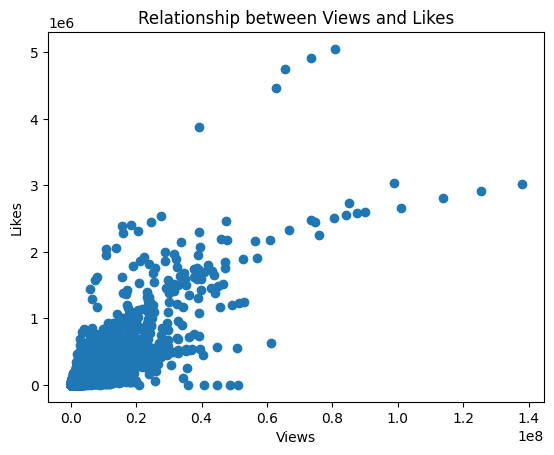

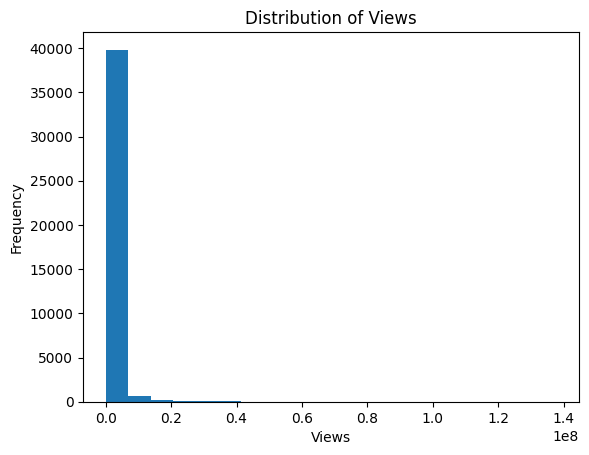

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of likes vs. views
plt.scatter(data['views'], data['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Relationship between Views and Likes')
plt.show()

# Histogram of views
plt.hist(data['views'], bins=20)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64
    category_id         views          likes      dislikes  comment_count
0             1  1.426729e+06   37767.962621   1510.319903    4896.394660
1             2  5.667594e+05   13405.422096    560.271955    2878.719547
2            10  3.532525e+06  151285.856339   5922.859823   14053.940499
3            15  6.384612e+05   23931.533875    501.363144    4941.837398
4            17  1.075584e+06   21330.972013   1179.177969    2748.956584
5            19  3.667014e+05    9568.658163    331.278061    1556.002551
6            20  9.237592e+05   38487.017857   1820.596726    7191.136161
7            22  7.864136e+05   25673.219001   2309.572716    4097.003898
8            23  9.828886e+05   51960.422475   1423.937185    5205.082428
9            24  1.01637

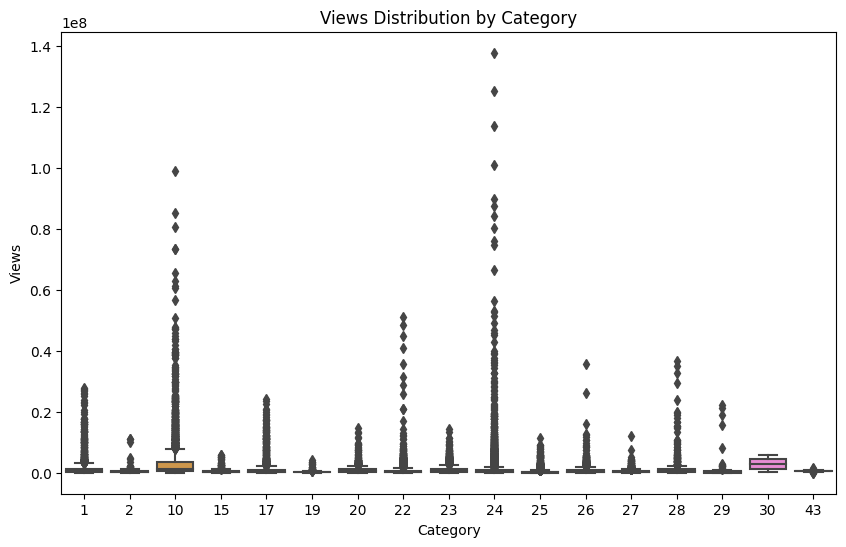

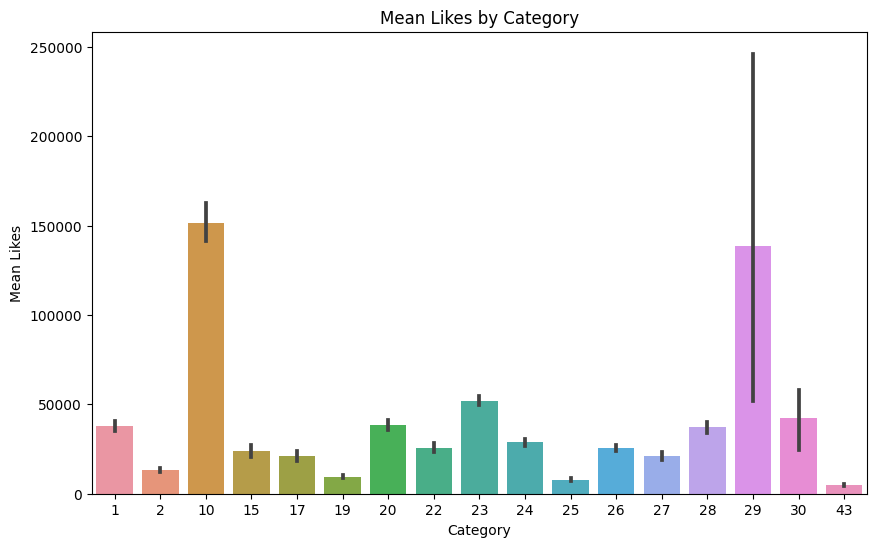

In [ ]:
# Count the number of videos in each category
category_counts = data['category_id'].value_counts()

# Display the count of videos in each category
print(category_counts)

# Grouping data by category and calculating summary statistics
category_stats = data.groupby('category_id').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Display category-wise statistics
print(category_stats)

import seaborn as sns

# Boxplot of views by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='views', data=data)
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Views Distribution by Category')
plt.show()

# Bar plot showing mean likes by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category_id', y='likes', data=data, estimator=lambda x: sum(x) / len(x))
plt.xlabel('Category')
plt.ylabel('Mean Likes')
plt.title('Mean Likes by Category')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


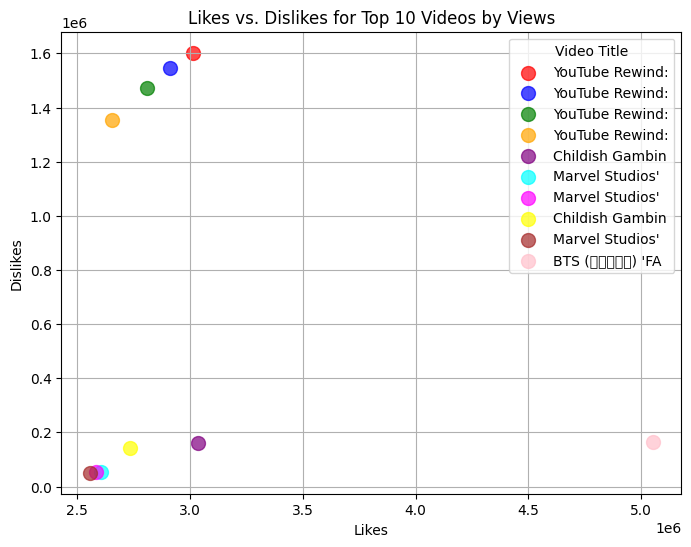

In [ ]:
# Sorting data by views to get the top 10 videos
top_10_videos = data.nlargest(10, 'views')

# Generating unique colors for each video
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Creating a scatter plot of likes vs. dislikes for the top 10 videos with separate colors and video titles in legend
plt.figure(figsize=(8, 6))
for i, (likes, dislikes, title) in enumerate(zip(top_10_videos['likes'], top_10_videos['dislikes'], top_10_videos['title'])):
    plt.scatter(likes, dislikes, s=100, c=colors[i], alpha=0.7, label=title[:15])  # Displaying first 15 characters of title

plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.title('Likes vs. Dislikes for Top 10 Videos by Views')
plt.legend(title='Video Title')
plt.grid(True)
plt.show()

<ipython-input-9-442950b2306d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(data["title_length"], kde=False, rug=False,


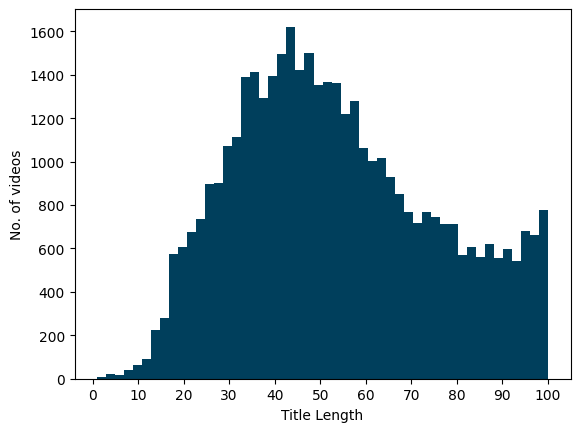

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
data["title_length"] = data["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(data["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

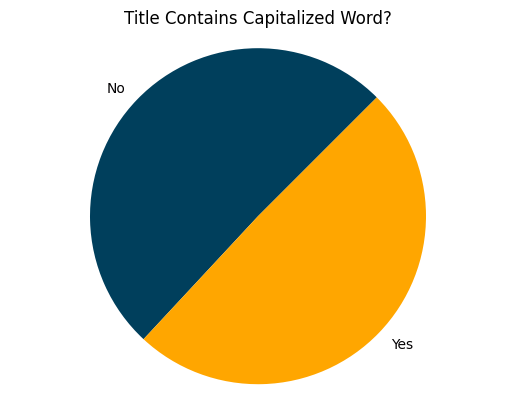

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


data["contains_capitalized"] = data["title"].apply(contains_capitalized_word)

value_counts = data["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
import wordcloud
from collections import Counter
title_words = list(data["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 12666),
 ('|', 12596),
 ('The', 5167),
 ('2018', 3765),
 ('the', 2498),
 ('Episode', 2298),
 ('&', 2286),
 ('to', 1903),
 ('in', 1797),
 ('of', 1774),
 ('and', 1699),
 ('A', 1522),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('2017', 1202),
 ('with', 1200),
 ('vs', 1177),
 ('Game', 1094),
 ('Full', 1056),
 ('2', 1030),
 ('Trump', 962),
 ('I', 938),
 ('In', 930),
 ('Official', 930)]

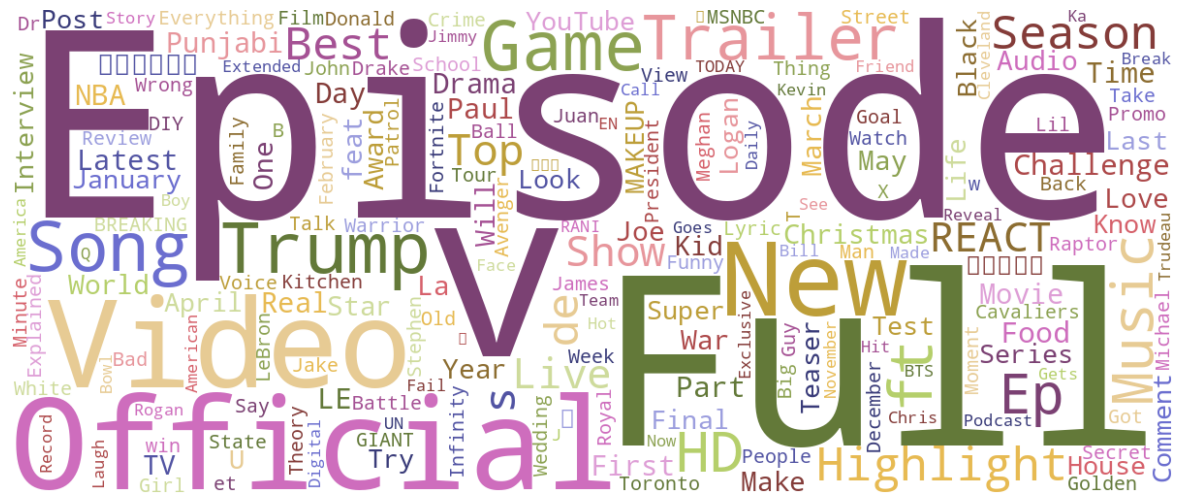

In [ ]:
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

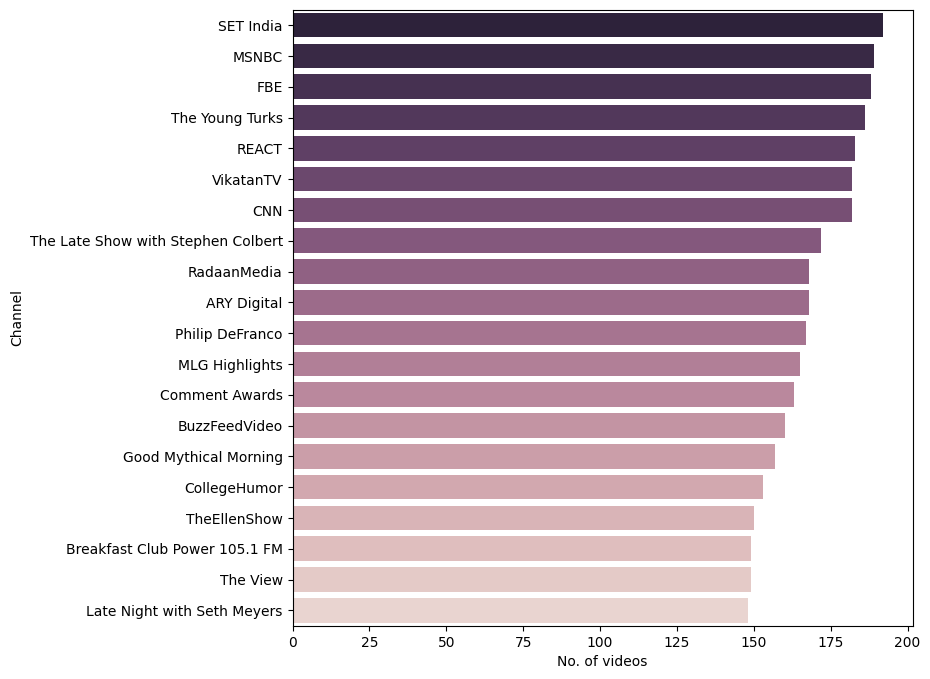

In [ ]:
cdf = data.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

### Category-wise trending videos
Which category is trending?

In [ ]:
import json
with open('/content/drive/My Drive/bigdata/CA_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
data['category_name'] = data['category_id'].map(cat_dict)

In [ ]:
import datetime

data["publishing_day"] = data["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
data["publishing_hour"] = data["publish_time"].apply(lambda x: x[11:13])
data.drop(labels='publish_time', axis=1, inplace=True)

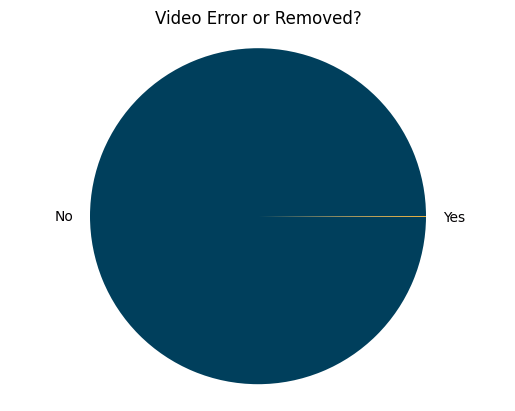

In [ ]:
value_counts = data["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

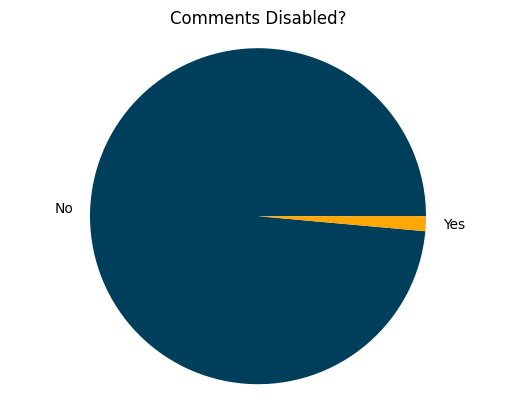

In [ ]:
value_counts = data["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

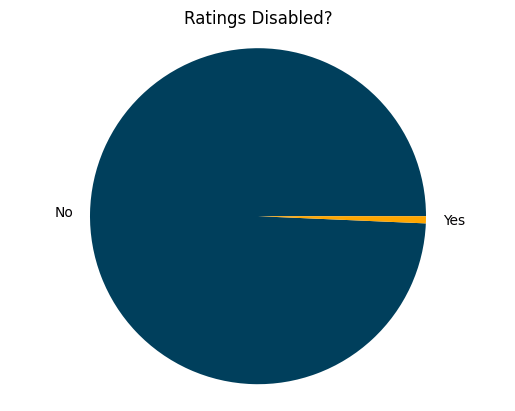

In [ ]:
value_counts = data["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

<ipython-input-21-da31079476a6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

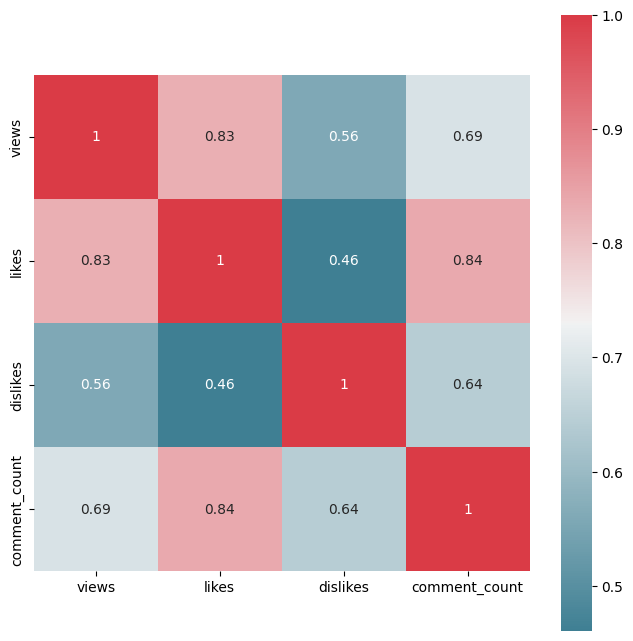

In [ ]:
import seaborn as sns
import numpy as np
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = data[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)